In [1]:
import torch 
import torchvision
import fastai.vision.all 
import matplotlib.pyplot as plt 

In [2]:
path=fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)

In [3]:
X3_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/3').ls()])/255
X8_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/8').ls()])/255
X0_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/0').ls()])/255

In [ ]:
X3_real.shape,X8_real.shape,X0_real.shape

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
k=0
for i in range(3):
    for j in range(3):
        if i==0:
            ax[i][j].imshow(X3_real[k].reshape(28,28),cmap="gray")
            ax[i][j].set_title(f"image {k}")
        if i==1:
            ax[i][j].imshow(X8_real[k].reshape(28,28),cmap="gray")
            ax[i][j].set_title(f"image {k}")
        if i==2:
            ax[i][j].imshow(X0_real[k].reshape(28,28),cmap="gray")
            ax[i][j].set_title(f"image {k}")
        k=k+1


## B. 페이커 생성

In [ ]:
X3_real.shape,X8_real.shape,X0_real.shape

In [5]:
class Reshape2828(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,X):
        return X.reshape(-1,1,28,28)

X3_num = 6131
latent_dim = 4
Noise3 = torch.randn(X3_num,latent_dim)
net3_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim,64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(64,784),
    torch.nn.Sigmoid(),
    Reshape2828()
)
X8_num = 5851
latent_dim = 4
Noise8 = torch.randn(X8_num,latent_dim)
net8_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim,64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(64,784),
    torch.nn.Sigmoid(),
    Reshape2828()
)
X0_num = 5923
latent_dim = 4
Noise0 = torch.randn(X0_num,latent_dim)
net0_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim,64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(64,784),
    torch.nn.Sigmoid(),
    Reshape2828()
)


In [ ]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
k=0
for i in range(3):
    for j in range(3):
        if i==0:
            ax[i][j].imshow(net3_faker(Noise3)[0].data.reshape(28,28),cmap="gray")
            ax[i][j].set_title(f"net3_image {k}")
        if i==1:
            ax[i][j].imshow(net8_faker(Noise3)[0].data.reshape(28,28),cmap="gray")
            ax[i][j].set_title(f"net8_image {k}")
        if i==2:
            ax[i][j].imshow(net0_faker(Noise3)[0].data.reshape(28,28),cmap="gray")
            ax[i][j].set_title(f"net9_image {k}")
        k=k+1


## C. 경찰 생성

> net_police: 진짜이미지 $\to$ 0 // 가짜이미지 $\to$ 1 와 같은 네트워크를 설계하자. 

`-` 네트워크의 입력: (n,1,28,28) 인 이미지 

`-` 네트워크의 출력: 0,1 

In [7]:
net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1),
    torch.nn.Sigmoid()
)

## D. 바보경찰, 바보페이커

> 스토리를 전개해볼까? 

`-` 경찰네트워크가 가짜이미지를 봤을때 어떤 판단을 하는지, 진짜 이미지를 봤을떄 어떤 판단을 하는지 살펴보자. 

***<경찰이 진짜이미지를 봤다면>***

`-` 진짜이미지 

In [ ]:
plt.imshow(X3_real[0].reshape(28,28),cmap="gray")

`-` 진짜 이미지를 경찰한테 한장 줘볼까? $\to$ yhat이 나올텐데, 이 값이 0이어야 함

In [ ]:
y3hat_real = net_police(X3_real[[0]]) # 이 값이 0이어야 하는데..
y3hat_real

In [ ]:
y8hat_real = net_police(X8_real[[0]]) # 이 값이 0이어야 하는데..
y8hat_real

## E. 똑똑해진 경찰

In [ ]:
X3_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/3').ls()])/255
X8_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/8').ls()])/255
X0_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/0').ls()])/255

In [ ]:
X3_real.shape,X8_real.shape,X0_real.shape

In [13]:
class Reshape2828(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,X):
        return X.reshape(-1,1,28,28)

X3_num = 6131
latent_dim = 4
Noise3 = torch.randn(X3_num,latent_dim)
net3_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim,64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(64,784),
    torch.nn.Sigmoid(),
    Reshape2828()
)

X8_num = 5851
latent_dim = 4
Noise8 = torch.randn(X8_num,latent_dim)
net8_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim,64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(64,784),
    torch.nn.Sigmoid(),
    Reshape2828()
)
X0_num = 5923
latent_dim = 4
Noise0 = torch.randn(X0_num,latent_dim)
net0_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim,64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(64,784),
    torch.nn.Sigmoid(),
    Reshape2828()
)


In [14]:
X3_num = 6131
Noise3 = torch.randn(X3_num,4)     # n = 6131
X3_fake = net3_faker(Noise3).data
y3_real = torch.tensor([0]*X3_num).reshape(-1,1).float()   # real
y3_fake = torch.tensor([1]*X3_num).reshape(-1,1).float()   # fake

X8_num = 5851
Noise8 = torch.randn(X8_num,latent_dim)
X8_fake = net8_faker(Noise8).data
y8_real = torch.tensor([0]*X8_num).reshape(-1,1).float()   # real
y8_fake = torch.tensor([1]*X8_num).reshape(-1,1).float()   # fake

X0_num = 5923
Noise0 = torch.randn(X0_num,latent_dim)
X0_fake = net0_faker(Noise0).data
y0_real = torch.tensor([0]*X0_num).reshape(-1,1).float()   # real
y0_fake = torch.tensor([1]*X0_num).reshape(-1,1).float()   # fake


In [ ]:
y3_real.shape , y3_fake.shape , y8_real.shape , y8_fake.shape , y0_real.shape , y0_fake.shape

In [ ]:
X3_fake.shape , X3_real.shape ,X8_fake.shape , X8_real.shape ,X0_fake.shape , X0_real.shape

`-` step1: X_real, X_fake를 보고 각가 yhat_real, yhat_fake를 만드는 과정 

In [20]:
y3hat_real = net_police(X3_real)
y3hat_fake = net_police(X3_fake)
#
y8hat_real = net_police(X8_real)
y8hat_fake = net_police(X8_fake)
#
y0hat_real = net_police(X0_real)
y0hat_fake = net_police(X0_fake)

`-` step2: 손실을 계산 -- 경찰의 미덕은 (1) 가짜이미지를 가짜라고 하고 (yhat_fake $\approx$ y_fake) (2) 진짜이미지를 진짜라고 해야한다. (yhat_real $\approx$ y_real)

In [ ]:
bce = torch.nn.BCELoss()
loss_police = bce(y3hat_fake,y3_fake) + bce(y3hat_real,y3_real) + \
              bce(y8hat_fake,y8_fake) + bce(y8hat_real,y8_real) + \
              bce(y0hat_fake,y0_fake) + bce(y0hat_real,y0_real)
loss_police

`-` step3~4는 별로 특별한게 없음. 그래서 바로 epoch을 진행시켜보자.

In [23]:
##
net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1),
    torch.nn.Sigmoid()
)
bce = torch.nn.BCELoss()
optimizr_police = torch.optim.Adam(net_police.parameters())
# Noise = torch.randn(6131,4) 

##
for epoc in range(50):
    latent_dim = 4

    X3_num = 6131
    Noise3 = torch.randn(X3_num,latent_dim)
    X3_fake = net3_faker(Noise3).data
    
    X8_num = 5851
    Noise8 = torch.randn(X8_num,latent_dim)
    X8_fake = net8_faker(Noise8).data

    X0_num = 5923
    Noise0 = torch.randn(X0_num,latent_dim)
    X0_fake = net0_faker(Noise0).data

    ## step1 
    y3hat_real = net_police(X3_real)  # 0이길 바람
    y3hat_fake = net_police(X3_fake)  # 1이길 바람
    y8hat_real = net_police(X8_real)  # 0이길 바람
    y8hat_fake = net_police(X8_fake)  # 1이길 바람
    y0hat_real = net_police(X0_real)  # 0이길 바람
    y0hat_fake = net_police(X0_fake)  # 1이길 바람

    ## step2
    loss_police = bce(y3hat_fake,y3_fake) + bce(y3hat_real,y3_real) + \
                bce(y8hat_fake,y8_fake) + bce(y8hat_real,y8_real) + \
                bce(y0hat_fake,y0_fake) + bce(y0hat_real,y0_real)
    ## step3 
    loss_police.backward()
    ## step4 
    optimizr_police.step()
    optimizr_police.zero_grad()

`-` 훈련된 경찰의 성능을 살펴보자. 

In [ ]:
net_police(X3_real),net_police(X8_real),net_police(X0_real) # 거의 0으로!

In [ ]:
net_police(X3_fake) , net_police(X8_fake) ,net_police(X0_fake)# 거의 1로!

`-` 꽤 우수한 경찰이 되었음

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(X3_fake[[-1]].data.reshape(28,28),cmap="gray"); ax[0].set_title("fake")
ax[1].imshow(X3_real[[-1]].reshape(28,28),cmap="gray"); ax[1].set_title("real")

## F. 더 똑똑해지는 페이커

`-` step1: Noise $\to$ X_fake

In [31]:
Noise3 = torch.randn(6131,4)
X3_fake = net3_faker(Noise3) 

`-` step2: 손실함수 -- 페이커의 미덕은 (잘 훈련된) 경찰이 가짜이미지를 진짜라고 판단하는 것. 즉 `yhat_fake` $\approx$ `y_real` 이어야 페이커의 실력이 우수하다고 볼 수 있음. 

In [34]:
y3hat_fake = net_police(X3_fake) 
loss_faker = bce(y3hat_fake,y3_real) ## 가짜이미지를 보고 잘 훈련된 경찰조차 진짜이미지라고 깜빡 속으면 위조범의 실력이 좋은 것임

`-` step3~4는 별로 특별한게 없음. 그래서 바로 epoch을 진행시켜보자.

In [44]:
net3_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64), # (n,4) -> (n,64) 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784), # (n,64) -> (n,784) 
    torch.nn.Sigmoid(), # 출력을 0~1로 눌러주는 역할.. -- 저는 이 레이어가 일종의 문화충격이었어요.. (시그모이드를 이렇게 쓴다고??)
    Reshape2828()
)
#bce = torch.nn.BCELoss()
optimizr3_faker = torch.optim.Adam(net3_faker.parameters())
#--#

In [48]:
for epoc in range(10):
    # step1
    Noise3 = torch.randn(6131,4) 
    X3_fake = net3_faker(Noise3) 
    # step2
    yhat3_fake = net_police(X3_fake) 
    # loss3_faker = bce(y3hat_fake,y3_real)
    loss3_faker = bce(net_police(X3_fake),y3_real)

    # step3 
    loss3_faker.backward()
    # step4 
    optimizr3_faker.step()
    optimizr3_faker.zero_grad()

In [ ]:
fig,ax = plt.subplots(2,5,figsize=(10,4))
k = 0 
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(X3_fake[k].reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {y3hat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

In [50]:
net8_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64), # (n,4) -> (n,64) 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784), # (n,64) -> (n,784) 
    torch.nn.Sigmoid(), # 출력을 0~1로 눌러주는 역할.. -- 저는 이 레이어가 일종의 문화충격이었어요.. (시그모이드를 이렇게 쓴다고??)
    Reshape2828()
)
#bce = torch.nn.BCELoss()
optimizr8_faker = torch.optim.Adam(net8_faker.parameters())
#--#

In [57]:
for epoc in range(10):
    # step1
    Noise8 = torch.randn(X8_num,latent_dim)
    X8_fake = net8_faker(Noise8) 
    # step2
    yhat8_fake = net_police(X8_fake) 
    # loss3_faker = bce(y3hat_fake,y3_real)
    loss8_faker = bce(net_police(X8_fake),y8_real)

    # step3 
    loss8_faker.backward()
    # step4 
    optimizr8_faker.step()
    optimizr8_faker.zero_grad()

In [ ]:
fig,ax = plt.subplots(2,5,figsize=(10,4))
k = 0 
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(X8_fake[k].reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {y8hat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

In [64]:
net0_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64), # (n,4) -> (n,64) 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784), # (n,64) -> (n,784) 
    torch.nn.Sigmoid(), # 출력을 0~1로 눌러주는 역할.. -- 저는 이 레이어가 일종의 문화충격이었어요.. (시그모이드를 이렇게 쓴다고??)
    Reshape2828()
)
#bce = torch.nn.BCELoss()
optimizr0_faker = torch.optim.Adam(net0_faker.parameters())
#--#

In [69]:
for epoc in range(10):
    # step1
    X0_num = 5923
    latent_dim = 4
    Noise0 = torch.randn(X0_num,latent_dim)
    X0_fake = net0_faker(Noise0) 
    # step2
    yhat0_fake = net_police(X0_fake) 
    loss0_faker = bce(net_police(X0_fake) ,y0_real)

    # step3 
    loss0_faker.backward()
    # step4 
    optimizr0_faker.step()
    optimizr0_faker.zero_grad()

In [ ]:
fig,ax = plt.subplots(2,5,figsize=(10,4))
k = 0 
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(X0_fake[k].reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {net_police(net0_faker(Noise0))[k].item():.4f}")
        k = k+1 
fig.tight_layout()

`-` 위조범의 실력향상을 감상해보자. 

In [ ]:
net_police(X0_fake) # 거의 0으로!

In [ ]:
y0hat_fake  # 가짜 이미지를 받아서 경찰이 판단한 결과. 1일수록 가짜라고 생각

In [ ]:
((y3hat_fake > 0.5) == 0)#.float().mean() # 경찰이 가짜이미지를 진짜라고 생각한 비율 = 페이커가 사기에 성공한 비율

## G. 경쟁학습

> 두 적대적인 네트워크를 경쟁시키자!

In [1]:
import torch 
import torchvision
import fastai.vision.all 
import matplotlib.pyplot as plt 

In [2]:
path=fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)

In [3]:
X3_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/3').ls()])/255
X8_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/8').ls()])/255
X0_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/0').ls()])/255

In [32]:
torch.manual_seed(43052)
# net_police = torch.nn.Sequential(
#     torch.nn.Flatten(),
#     torch.nn.Linear(in_features=784,out_features=30),
#     torch.nn.ReLU(),
#     torch.nn.Linear(in_features=30,out_features=1),
#     torch.nn.Sigmoid()
# )
net_police = torch.nn.Sequential(
    # Conv Layer 1: (1, 28, 28) -> (64, 14, 14)
    torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),  # 큰 커널로 초기 특징 추출
    torch.nn.BatchNorm2d(64),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1),      # (64, 14, 14) -> (64, 7, 7)
    
    # Conv Layer 2: (64, 7, 7) -> (128, 7, 7)
    torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    torch.nn.BatchNorm2d(128),
    torch.nn.ReLU(),
    
    # Conv Layer 3: (128, 7, 7) -> (256, 7, 7)
    torch.nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
    torch.nn.BatchNorm2d(256),
    torch.nn.ReLU(),
    
    # Flatten to a single vector (256 * 7 * 7 = 12544)
    torch.nn.Flatten(),

    # Fully Connected Layer 1: (12544 -> 128)
    torch.nn.Linear(256 * 7 * 7, 128),
    torch.nn.ReLU(),
    
    # Fully Connected Layer 2: (128 -> 1)
    torch.nn.Linear(128, 1),
    torch.nn.Sigmoid()  # Output probability
)


class Reshape2828(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,X):
        return X.reshape(-1,1,28,28)

X3_num = 6131
latent_dim = 64
Noise3 = torch.randn(X3_num,latent_dim)
net3_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim,64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(64,784),
    torch.nn.Sigmoid(),
    Reshape2828()
)
X8_num = 5851
Noise8 = torch.randn(X8_num,latent_dim)
net8_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim,64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(64,784),
    torch.nn.Sigmoid(),
    Reshape2828()
)
X0_num = 5923
Noise0 = torch.randn(X0_num,latent_dim)
net0_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim,64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(64,784),
    torch.nn.Sigmoid(),
    Reshape2828()
)

bce = torch.nn.BCELoss()
optimizr_police = torch.optim.Adam(net_police.parameters(),lr=0.001,betas=(0.5,0.999))
optimizr3_faker = torch.optim.Adam(net3_faker.parameters(),lr=0.0002,betas=(0.5,0.999))
optimizr8_faker = torch.optim.Adam(net8_faker.parameters(),lr=0.0002,betas=(0.5,0.999))
optimizr0_faker = torch.optim.Adam(net0_faker.parameters(),lr=0.0002,betas=(0.5,0.999))


In [15]:
net3_faker(Noise3).shape

torch.Size([6131, 1, 28, 28])

In [33]:
X3_num = 6131
# Noise3 = torch.randn(X3_num,latent_dim)     # n = 6131
X3_fake = net3_faker(Noise3).data
y3_real = torch.tensor([0]*X3_num).reshape(-1,1).float()   # real
y3_fake = torch.tensor([1]*X3_num).reshape(-1,1).float()   # fake

X8_num = 5851
# Noise8 = torch.randn(X8_num,latent_dim)
X8_fake = net8_faker(Noise8).data
y8_real = torch.tensor([0]*X8_num).reshape(-1,1).float()   # real
y8_fake = torch.tensor([1]*X8_num).reshape(-1,1).float()   # fake

X0_num = 5923
# Noise0 = torch.randn(X0_num,latent_dim)
X0_fake = net0_faker(Noise0).data
y0_real = torch.tensor([0]*X0_num).reshape(-1,1).float()   # real
y0_fake = torch.tensor([1]*X0_num).reshape(-1,1).float()   # fake


In [ ]:
# for epoc in range(100):
#     # net_police 을 훈련
#     Noise3 = torch.randn(6131,4) 
#     X3_fake = net3_faker(Noise3).data # net_faker에 대한 미분꼬리표는 여기선 필요없으므로 .data 만을 이용
#     ## step1 
#     y3hat_real = net_police(X3_real)
#     y3hat_fake = net_police(X3_fake)
#     ## step2 
#     loss_police = bce(y3hat_real,y3_real) + bce(y3hat_fake,y3_fake)
#     ## step3 
#     loss_police.backward()
#     ## step4 
#     optimizr_police.step()
#     optimizr_police.zero_grad()
#     # net_faker 를 훈련
#     ## step1 
#     Noise3 = torch.randn(6131,4) 
#     X3_fake = net3_faker(Noise3)
#     ## step2 
#     y3hat_fake = net_police(X3_fake)
#     loss_faker = bce(y3hat_fake,y3_real) 
#     ## step3
#     loss_faker.backward()
#     ## step4 
#     optimizr3_faker.step()
#     optimizr3_faker.zero_grad()
# fig,ax = plt.subplots(2,5,figsize=(10,4))
# k = 0 
# for i in range(2):
#     for j in range(5):
#         ax[i][j].imshow(X3_fake[k].reshape(28,28).data,cmap="gray")
#         ax[i][j].set_title(f"police hat = {y3hat_fake[k].item():.4f}")
#         k = k+1 
# fig.tight_layout()

In [34]:
for epoc in range(100):
    # net_police 을 훈련
    X3_num = 6131
    # latent_dim = 4
    Noise3 = torch.randn(X3_num,latent_dim)
    X8_num = 5851
    # latent_dim = 4
    Noise8 = torch.randn(X8_num,latent_dim)
    X0_num = 5923
    # latent_dim = 4
    Noise0 = torch.randn(X0_num,latent_dim)

    X3_fake = net3_faker(Noise3).data # net_faker에 대한 미분꼬리표는 여기선 필요없으므로 .data 만을 이용
    X8_fake = net8_faker(Noise8).data # net_faker에 대한 미분꼬리표는 여기선 필요없으므로 .data 만을 이용
    X0_fake = net0_faker(Noise0).data # net_faker에 대한 미분꼬리표는 여기선 필요없으므로 .data 만을 이용

    ## step1 
    y3hat_real = net_police(X3_real)
    y3hat_fake = net_police(X3_fake)
    y8hat_real = net_police(X8_real)
    y8hat_fake = net_police(X8_fake)
    y0hat_real = net_police(X0_real)
    y0hat_fake = net_police(X0_fake)

    ## step2 
    loss_police = bce(y3hat_real,y3_real) + bce(y3hat_fake,y3_fake) + \
                  bce(y8hat_real,y8_real) + bce(y8hat_fake,y8_fake) + \
                  bce(y0hat_real,y0_real) + bce(y0hat_fake,y0_fake) 

    ## step3 
    loss_police.backward()
    ## step4 
    optimizr_police.step()
    optimizr_police.zero_grad()
    
    # net_faker 를 훈련
    ## step1 
    Noise3 = torch.randn(6131,latent_dim) 
    X3_fake = net3_faker(Noise3)
    X8_fake = net8_faker(Noise8)
    X0_fake = net0_faker(Noise0)

    ## step2 
    y3hat_fake = net_police(X3_fake)
    loss3_faker = bce(net_police(X3_fake),y3_real) 
    y8hat_fake = net_police(X8_fake)
    loss8_faker = bce(net_police(X8_fake),y8_real) 
    y0hat_fake = net_police(X0_fake)
    loss0_faker = bce(net_police(X0_fake),y0_real) 

    ## step3
    loss3_faker.backward()
    loss8_faker.backward()
    loss0_faker.backward()

    ## step4 
    optimizr3_faker.step()
    optimizr3_faker.zero_grad()
    optimizr8_faker.step()
    optimizr8_faker.zero_grad()
    optimizr0_faker.step()
    optimizr0_faker.zero_grad()

fig,ax = plt.subplots(3,5,figsize=(10,4))
k = 0 
for i in range(3):
    for j in range(5):
        if i==0:
            ax[i][j].imshow(X3_fake[k].reshape(28,28).data,cmap="gray")
            ax[i][j].set_title(f"police hat = {y3hat_fake[k].item():.4f}")
        if i==1:
            ax[i][j].imshow(X8_fake[k].reshape(28,28).data,cmap="gray")
            ax[i][j].set_title(f"police hat = {y8hat_fake[k].item():.4f}")
        if i==2:
            ax[i][j].imshow(X0_fake[k].reshape(28,28).data,cmap="gray")
            ax[i][j].set_title(f"police hat = {y0hat_fake[k].item():.4f}")


        k = k+1 
fig.tight_layout()

In [1]:
import torch
import torchvision
import fastai.vision.all 
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader, TensorDataset

# 데이터셋 불러오기
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)
X3_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/3').ls()]) / 255.0
X8_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/8').ls()]) / 255.0
X0_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/0').ls()]) / 255.0

# GPU 사용 여부 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 배치 크기 설정
batch_size = 64

# 데이터셋 정의 및 DataLoader 설정 (shuffle=True)
X3_dataset = TensorDataset(X3_real, torch.zeros(len(X3_real), 1))  # label=0 for real
X8_dataset = TensorDataset(X8_real, torch.zeros(len(X8_real), 1))
X0_dataset = TensorDataset(X0_real, torch.zeros(len(X0_real), 1))

X3_loader = DataLoader(X3_dataset, batch_size=batch_size, shuffle=True)
X8_loader = DataLoader(X8_dataset, batch_size=batch_size, shuffle=True)
X0_loader = DataLoader(X0_dataset, batch_size=batch_size, shuffle=True)
net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1),
    torch.nn.Sigmoid()
).to(device)

# # 간소화된 net_police 구조
# net_police = torch.nn.Sequential(
#     # Conv Layer 1: (1, 28, 28) -> (32, 14, 14)
#     torch.nn.Conv2d(1, 32, kernel_size=5, stride=2, padding=2),  # 작은 커널과 채널 수를 사용
#     torch.nn.BatchNorm2d(32),
#     torch.nn.ReLU(),
    
#     # Conv Layer 2: (32, 14, 14) -> (64, 7, 7)
#     torch.nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
#     torch.nn.BatchNorm2d(64),
#     torch.nn.ReLU(),
    
#     # Conv Layer 3: (64, 7, 7) -> (128, 7, 7)
#     torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#     torch.nn.BatchNorm2d(128),
#     torch.nn.ReLU(),
    
#     # Flatten to a single vector (128 * 7 * 7 = 6272)
#     torch.nn.Flatten(),
#     torch.nn.Linear(128 * 7 * 7, 64),  # Fully Connected Layer 1: (6272 -> 64)
#     torch.nn.ReLU(),
#     torch.nn.Linear(64, 1),  # Fully Connected Layer 2: (64 -> 1)
#     torch.nn.Sigmoid()  # Output probability
# ).to(device)  # 모델을 GPU로 이동

# Reshape 레이어
class Reshape2828(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,X):
        return X.reshape(-1,1,28,28)

# 생성기(faker) 모델 정의
latent_dim = 64
net3_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)

net8_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)

net0_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)

# 손실 함수와 옵티마이저 정의
bce = torch.nn.BCELoss().to(device)
optimizr_police = torch.optim.Adam(net_police.parameters(), lr=0.001, betas=(0.5, 0.999))
optimizr3_faker = torch.optim.Adam(net3_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizr8_faker = torch.optim.Adam(net8_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizr0_faker = torch.optim.Adam(net0_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))

# 학습 루프
epochs = 100
for epoch in range(epochs):
    for (X3_batch, _), (X8_batch, _), (X0_batch, _) in zip(X3_loader, X8_loader, X0_loader):
        # 데이터를 GPU로 이동
        X3_batch = X3_batch.to(device)
        X8_batch = X8_batch.to(device)
        X0_batch = X0_batch.to(device)

        # 노이즈 생성 및 GPU로 이동
        Noise3 = torch.randn(X3_batch.size(0), latent_dim).to(device)
        Noise8 = torch.randn(X8_batch.size(0), latent_dim).to(device)
        Noise0 = torch.randn(X0_batch.size(0), latent_dim).to(device)

        X3_fake = net3_faker(Noise3).data
        X8_fake = net8_faker(Noise8).data
        X0_fake = net0_faker(Noise0).data

        # 판별기 학습
        ## real 데이터 예측
        y3hat_real = net_police(X3_batch)
        y8hat_real = net_police(X8_batch)
        y0hat_real = net_police(X0_batch)
        
        ## fake 데이터 예측
        y3hat_fake = net_police(X3_fake)
        y8hat_fake = net_police(X8_fake)
        y0hat_fake = net_police(X0_fake)

        ## real 및 fake에 대한 손실 계산
        loss_police = bce(y3hat_real, torch.zeros_like(y3hat_real)) + bce(y3hat_fake, torch.ones_like(y3hat_fake)) + \
                      bce(y8hat_real, torch.zeros_like(y8hat_real)) + bce(y8hat_fake, torch.ones_like(y8hat_fake)) + \
                      bce(y0hat_real, torch.zeros_like(y0hat_real)) + bce(y0hat_fake, torch.ones_like(y0hat_fake))

        ## 판별기 업데이트
        loss_police.backward()
        optimizr_police.step()
        optimizr_police.zero_grad()

        # 생성기 학습
        ## 새로 노이즈 생성 및 가짜 데이터 생성
        Noise3 = torch.randn(X3_batch.size(0), latent_dim).to(device)
        Noise8 = torch.randn(X8_batch.size(0), latent_dim).to(device)
        Noise0 = torch.randn(X0_batch.size(0), latent_dim).to(device)

        X3_fake = net3_faker(Noise3)
        X8_fake = net8_faker(Noise8)
        X0_fake = net0_faker(Noise0)

        ## 생성기 손실 계산
        loss3_faker = bce(net_police(X3_fake), torch.zeros_like(net_police(X3_fake)))
        loss8_faker = bce(net_police(X8_fake), torch.zeros_like(net_police(X8_fake)))
        loss0_faker = bce(net_police(X0_fake), torch.zeros_like(net_police(X0_fake)))

        ## 생성기 업데이트
        loss3_faker.backward()
        loss8_faker.backward()
        loss0_faker.backward()

        optimizr3_faker.step()
        optimizr3_faker.zero_grad()
        optimizr8_faker.step()
        optimizr8_faker.zero_grad()
        optimizr0_faker.step()
        optimizr0_faker.zero_grad()

# 시각화
fig, ax = plt.subplots(3, 5, figsize=(10, 4))
k = 0 
for i in range(3):
    for j in range(5):
        if i == 0:
            ax[i][j].imshow(X3_fake[k].cpu().reshape(28, 28).data, cmap="gray")
            ax[i][j].set_title(f"police hat = {y3hat_fake[k].item():.4f}")
        if i == 1:
            ax[i][j].imshow(X8_fake[k].cpu().reshape(28, 28).data, cmap="gray")
            ax[i][j].set_title(f"police hat = {y8hat_fake[k].item():.4f}")
        if i == 2:
            ax[i][j].imshow(X0_fake[k].cpu().reshape(28, 28).data, cmap="gray")
            ax[i][j].set_title(f"police hat = {y0hat_fake[k].item():.4f}")

        k += 1
fig.tight_layout()


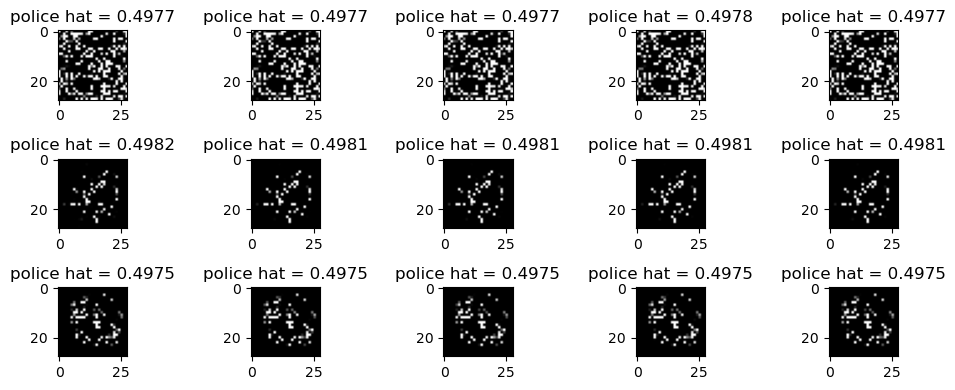

In [1]:
import torch
import torchvision
import fastai.vision.all 
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader, TensorDataset

# 데이터셋 불러오기
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)
X3_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/3').ls()]) / 255.0
X8_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/8').ls()]) / 255.0
X0_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/0').ls()]) / 255.0

# GPU 사용 여부 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 배치 크기 설정
batch_size = 64

# 데이터셋 정의 및 DataLoader 설정 (shuffle=True)
X3_dataset = TensorDataset(X3_real, torch.zeros(len(X3_real), 1))  # label=0 for real
X8_dataset = TensorDataset(X8_real, torch.zeros(len(X8_real), 1))
X0_dataset = TensorDataset(X0_real, torch.zeros(len(X0_real), 1))

X3_loader = DataLoader(X3_dataset, batch_size=batch_size, shuffle=True)
X8_loader = DataLoader(X8_dataset, batch_size=batch_size, shuffle=True)
X0_loader = DataLoader(X0_dataset, batch_size=batch_size, shuffle=True)

# Reshape 레이어
class Reshape2828(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, X):
        return X.reshape(-1, 1, 28, 28)

# Multi-task 판별기 정의
class MultiTaskPolice(torch.nn.Module):
    def __init__(self):
        super(MultiTaskPolice, self).__init__()
        self.shared_layers = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=784, out_features=128),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=128, out_features=64),
            torch.nn.ReLU()
        )
        
        # 두 가지 출력: 진짜/가짜 여부와 클래스(3, 8, 0) 구분
        self.real_fake = torch.nn.Linear(64, 1)  # 진짜/가짜 여부 (이진 분류)
        self.classifier = torch.nn.Linear(64, 3)  # 숫자 3, 8, 0 구분 (세 가지 클래스)

    def forward(self, x):
        shared_representation = self.shared_layers(x)
        real_fake_output = torch.sigmoid(self.real_fake(shared_representation))  # 진짜/가짜 확률
        class_output = self.classifier(shared_representation)  # 클래스 (3, 8, 0)
        return real_fake_output, class_output

# Multi-task 판별기 초기화
net_police = MultiTaskPolice().to(device)

# 생성기(faker) 모델 정의
latent_dim = 64
net3_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)

net8_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)

net0_faker = torch.nn.Sequential(
    torch.nn.Linear(latent_dim, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)

# 손실 함수 정의
bce = torch.nn.BCELoss().to(device)  # 진짜/가짜에 대한 손실
ce = torch.nn.CrossEntropyLoss().to(device)  # 숫자(3, 8, 0)에 대한 손실

# 옵티마이저 정의
optimizr_police = torch.optim.Adam(net_police.parameters(), lr=0.001, betas=(0.5, 0.999))
optimizr3_faker = torch.optim.Adam(net3_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizr8_faker = torch.optim.Adam(net8_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizr0_faker = torch.optim.Adam(net0_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))

# 학습 루프
epochs = 100
for epoch in range(epochs):
    for (X3_batch, _), (X8_batch, _), (X0_batch, _) in zip(X3_loader, X8_loader, X0_loader):
        # 데이터를 GPU로 이동
        X3_batch = X3_batch.to(device)
        X8_batch = X8_batch.to(device)
        X0_batch = X0_batch.to(device)

        # 노이즈 생성 및 GPU로 이동
        Noise3 = torch.randn(X3_batch.size(0), latent_dim).to(device)
        Noise8 = torch.randn(X8_batch.size(0), latent_dim).to(device)
        Noise0 = torch.randn(X0_batch.size(0), latent_dim).to(device)

        X3_fake = net3_faker(Noise3).data
        X8_fake = net8_faker(Noise8).data
        X0_fake = net0_faker(Noise0).data

        # 진짜/가짜 예측 및 클래스 예측
        y3hat_real, class3_real = net_police(X3_batch)
        y8hat_real, class8_real = net_police(X8_batch)
        y0hat_real, class0_real = net_police(X0_batch)

        y3hat_fake, class3_fake = net_police(X3_fake)
        y8hat_fake, class8_fake = net_police(X8_fake)
        y0hat_fake, class0_fake = net_police(X0_fake)

        # 숫자에 대한 라벨 (3은 0, 8은 1, 0은 2로 라벨링)
        class_labels_3 = torch.zeros(X3_batch.size(0), dtype=torch.long).to(device)  # 라벨 0 (3)
        class_labels_8 = torch.ones(X8_batch.size(0), dtype=torch.long).to(device)   # 라벨 1 (8)
        class_labels_0 = torch.full((X0_batch.size(0),), 2, dtype=torch.long).to(device)  # 라벨 2 (0)

        # 진짜/가짜 손실 (BCELoss)
        loss_real_fake = bce(y3hat_real, torch.zeros_like(y3hat_real)) + \
                         bce(y3hat_fake, torch.ones_like(y3hat_fake)) + \
                         bce(y8hat_real, torch.zeros_like(y8hat_real)) + \
                         bce(y8hat_fake, torch.ones_like(y8hat_fake)) + \
                         bce(y0hat_real, torch.zeros_like(y0hat_real)) + \
                         bce(y0hat_fake, torch.ones_like(y0hat_fake))

        # 클래스 예측 손실 (CrossEntropyLoss)
        loss_class = ce(class3_real, class_labels_3) + ce(class3_fake, class_labels_3) + \
                     ce(class8_real, class_labels_8) + ce(class8_fake, class_labels_8) + \
                     ce(class0_real, class_labels_0) + ce(class0_fake, class_labels_0)

        # 최종 판별기 손실
        loss_police = loss_real_fake + loss_class

        # 판별기 업데이트
        loss_police.backward()
        optimizr_police.step()
        optimizr_police.zero_grad()

        # 생성기 학습은 기존과 동일
        Noise3 = torch.randn(X3_batch.size(0), latent_dim).to(device)
        Noise8 = torch.randn(X8_batch.size(0), latent_dim).to(device)
        Noise0 = torch.randn(X0_batch.size(0), latent_dim).to(device)

        X3_fake = net3_faker(Noise3)
        X8_fake = net8_faker(Noise8)
        X0_fake = net0_faker(Noise0)

        loss3_faker = bce(net_police(X3_fake)[0], torch.zeros_like(net_police(X3_fake)[0]))
        loss8_faker = bce(net_police(X8_fake)[0], torch.zeros_like(net_police(X8_fake)[0]))
        loss0_faker = bce(net_police(X0_fake)[0], torch.zeros_like(net_police(X0_fake)[0]))

        loss3_faker.backward()
        loss8_faker.backward()
        loss0_faker.backward()

        optimizr3_faker.step()
        optimizr3_faker.zero_grad()
        optimizr8_faker.step()
        optimizr8_faker.zero_grad()
        optimizr0_faker.step()
        optimizr0_faker.zero_grad()

# 시각화
fig, ax = plt.subplots(3, 5, figsize=(10, 4))
k = 0 
for i in range(3):
    for j in range(5):
        if i == 0:
            ax[i][j].imshow(X3_fake[k].cpu().reshape(28, 28).data, cmap="gray")
            ax[i][j].set_title(f"police hat = {y3hat_fake[k].item():.4f}")
        if i == 1:
            ax[i][j].imshow(X8_fake[k].cpu().reshape(28, 28).data, cmap="gray")
            ax[i][j].set_title(f"police hat = {y8hat_fake[k].item():.4f}")
        if i == 2:
            ax[i][j].imshow(X0_fake[k].cpu().reshape(28, 28).data, cmap="gray")
            ax[i][j].set_title(f"police hat = {y0hat_fake[k].item():.4f}")

        k += 1
fig.tight_layout()
plt.show()


In [6]:
net = torch.nn.Linear(in_features=2,out_features=1,bias=True)
list(net.parameters())

[Parameter containing:
 tensor([[-0.1379, -0.1392]], requires_grad=True),
 Parameter containing:
 tensor([-0.2382], requires_grad=True)]

In [ ]:
for epoc in range(1000):
    # net_police 훈련
    X3_num = 6131
    # latent_dim = 4
    Noise3 = torch.randn(X3_num, latent_dim)
    X8_num = 5851
    # latent_dim = 4
    Noise8 = torch.randn(X8_num, latent_dim)
    X0_num = 5923
    # latent_dim = 4
    Noise0 = torch.randn(X0_num, latent_dim)

    with torch.no_grad():  # .data 대신 no_grad 사용
        X3_fake = net3_faker(Noise3)
        X8_fake = net8_faker(Noise8)
        X0_fake = net0_faker(Noise0)

    ## step1: 실제 및 가짜 이미지에 대한 판별기 예측
    y3hat_real = net_police(X3_real)
    y3hat_fake = net_police(X3_fake)
    y8hat_real = net_police(X8_real)
    y8hat_fake = net_police(X8_fake)
    y0hat_real = net_police(X0_real)
    y0hat_fake = net_police(X0_fake)

    ## step2: 판별기 손실 계산 (real은 1, fake는 0)
    loss_police = bce(y3hat_real, torch.ones_like(y3hat_real)) + bce(y3hat_fake, torch.zeros_like(y3hat_fake)) + \
                  bce(y8hat_real, torch.ones_like(y8hat_real)) + bce(y8hat_fake, torch.zeros_like(y8hat_fake)) + \
                  bce(y0hat_real, torch.ones_like(y0hat_real)) + bce(y0hat_fake, torch.zeros_like(y0hat_fake))

    ## step3: 판별기 역전파
    loss_police.backward()
    
    ## step4: 가중치 업데이트
    optimizr_police.step()
    optimizr_police.zero_grad()

    # net_faker 훈련
    ## step1: 생성기 손실 계산 (fake가 real로 분류되도록)
    Noise3 = torch.randn(6131, latent_dim)
    X3_fake = net3_faker(Noise3)
    X8_fake = net8_faker(Noise8)
    X0_fake = net0_faker(Noise0)

    ## step2: 판별기 예측 및 생성기 손실 계산
    loss3_faker = bce(net_police(X3_fake), torch.ones_like(y3hat_fake))  # 생성된 이미지를 real로
    loss8_faker = bce(net_police(X8_fake), torch.ones_like(y8hat_fake))
    loss0_faker = bce(net_police(X0_fake), torch.ones_like(y0hat_fake))

    ## step3: 생성기 역전파
    optimizr3_faker.zero_grad()
    loss3_faker.backward()
    optimizr3_faker.step()

    optimizr8_faker.zero_grad()
    loss8_faker.backward()
    optimizr8_faker.step()

    optimizr0_faker.zero_grad()
    loss0_faker.backward()
    optimizr0_faker.step()

fig, ax = plt.subplots(3, 5, figsize=(10, 4))
k = 0
for i in range(3):
    for j in range(5):
        if i == 0:
            ax[i][j].imshow(X3_fake[k].reshape(28, 28).data, cmap="gray")
            ax[i][j].set_title(f"police hat = {y3hat_fake[k].item():.4f}")
        if i == 1:
            ax[i][j].imshow(X8_fake[k].reshape(28, 28).data, cmap="gray")
            ax[i][j].set_title(f"police hat = {y8hat_fake[k].item():.4f}")
        if i == 2:
            ax[i][j].imshow(X0_fake[k].reshape(28, 28).data, cmap="gray")
            ax[i][j].set_title(f"police hat = {y0hat_fake[k].item():.4f}")

        k += 1
fig.tight_layout()


In [ ]:
net3_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64), # (n,4) -> (n,64) 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784), # (n,64) -> (n,784) 
    torch.nn.Sigmoid(), # 출력을 0~1로 눌러주는 역할.. -- 저는 이 레이어가 일종의 문화충격이었어요.. (시그모이드를 이렇게 쓴다고??)
    Reshape2828()
)
#bce = torch.nn.BCELoss()
optimizr3_faker = torch.optim.Adam(net3_faker.parameters())
#--#

In [ ]:
net3_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64), # (n,4) -> (n,64) 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784), # (n,64) -> (n,784) 
    torch.nn.Sigmoid(), # 출력을 0~1로 눌러주는 역할.. -- 저는 이 레이어가 일종의 문화충격이었어요.. (시그모이드를 이렇게 쓴다고??)
    Reshape2828()
)
#bce = torch.nn.BCELoss()
optimizr3_faker = torch.optim.Adam(net3_faker.parameters())
#--#

In [ ]:
for epoc in range(10):
    # step1
    Noise3 = torch.randn(6131,4) 
    X3_fake = net3_faker(Noise3) 
    # step2
    yhat3_fake = net_police(X3_fake) 
    # loss3_faker = bce(y3hat_fake,y3_real)
    loss3_faker = bce(net_police(X3_fake),y3_real)

    # step3 
    loss3_faker.backward()
    # step4 
    optimizr3_faker.step()
    optimizr3_faker.zero_grad()

In [ ]:
fig,ax = plt.subplots(2,5,figsize=(10,4))
k = 0 
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(X3_fake[k].reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {y3hat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

In [ ]:
for epoc in range(10):
    # step1
    Noise8 = torch.randn(6131,4) 
    X3_fake = net3_faker(Noise3) 
    # step2
    yhat3_fake = net_police(X3_fake) 
    # loss3_faker = bce(y3hat_fake,y3_real)
    loss3_faker = bce(net_police(X3_fake),y3_real)

    # step3 
    loss3_faker.backward()
    # step4 
    optimizr3_faker.step()
    optimizr3_faker.zero_grad()

In [ ]:
for epoc in range(10):
    # step1
    Noise3 = torch.randn(6131,4) 
    X3_fake = net3_faker(Noise3) 
    # step2
    yhat3_fake = net_police(X3_fake) 
    # loss3_faker = bce(y3hat_fake,y3_real)
    loss3_faker = bce(net_police(X3_fake),y3_real)

    # step3 
    loss3_faker.backward()
    # step4 
    optimizr3_faker.step()
    optimizr3_faker.zero_grad()

In [ ]:
fig,ax = plt.subplots(2,5,figsize=(10,4))
k = 0 
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(X3_fake[k].reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {y3hat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

In [ ]:
for epoc in range(10):
    # step1
    Noise8 = torch.randn(6131,4) 
    X3_fake = net3_faker(Noise3) 
    # step2
    yhat3_fake = net_police(X3_fake) 
    # loss3_faker = bce(y3hat_fake,y3_real)
    loss3_faker = bce(net_police(X3_fake),y3_real)

    # step3 
    loss3_faker.backward()
    # step4 
    optimizr3_faker.step()
    optimizr3_faker.zero_grad()

CUDA 사용하여 학습 30000회

In [ ]:

# CUDA 사용 가능한지 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 임의의 시드 설정
torch.manual_seed(43052)

# 모델 정의
class Reshape2828(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 28, 28)  # (n, 784) -> (n, 28, 28)

net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30, out_features=1),
    torch.nn.Sigmoid()
).to(device)

net_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)

# 손실 함수와 옵티마이저
bce = torch.nn.BCELoss().to(device)
optimizr_police = torch.optim.Adam(net_police.parameters(), lr=0.001, betas=(0.5, 0.999))
optimizr_faker = torch.optim.Adam(net_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))

for epoc in range(30000):
    # net_police 훈련
    Noise = torch.randn(6131, 4).to(device) 
    X_fake = net_faker(Noise).detach()  # .detach() 사용하여 불필요한 그래디언트 추적 방지
    yhat_real = net_police(X_real.to(device))
    yhat_fake = net_police(X_fake)
    loss_police = bce(yhat_real, y_real.to(device)) + bce(yhat_fake, y_fake.to(device))
    loss_police.backward()
    optimizr_police.step()
    optimizr_police.zero_grad()

    # net_faker 훈련
    Noise = torch.randn(6131, 4).to(device)
    X_fake = net_faker(Noise)
    yhat_fake = net_police(X_fake)
    loss_faker = bce(yhat_fake, y_real.to(device))
    loss_faker.backward()
    optimizr_faker.step()
    optimizr_faker.zero_grad()


In [ ]:
fig,ax = plt.subplots(3,5,figsize=(10,4))
k = 0 
for i in range(3):
    for j in range(5):
        ax[i][j].imshow(X_fake[k].to("cpu").reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {yhat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

CUDA 사용하여 학습 10000회

In [ ]:

# CUDA 사용 가능한지 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 임의의 시드 설정
torch.manual_seed(43052)

# 모델 정의
class Reshape2828(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 28, 28)  # (n, 784) -> (n, 28, 28)

net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30, out_features=1),
    torch.nn.Sigmoid()
).to(device)

net_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)




In [46]:
# 손실 함수와 옵티마이저
bce = torch.nn.BCELoss().to(device)
optimizr_police = torch.optim.Adam(net_police.parameters(), lr=0.001, betas=(0.5, 0.999))
optimizr_faker = torch.optim.Adam(net_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))

for epoc in range(10000):
    # net_police 훈련
    Noise = torch.randn(6131, 4).to(device) 
    X_fake = net_faker(Noise).detach()  # .detach() 사용하여 불필요한 그래디언트 추적 방지
    yhat_real = net_police(X_real.to(device))
    yhat_fake = net_police(X_fake)
    loss_police = bce(yhat_real, y_real.to(device)) + bce(yhat_fake, y_fake.to(device))
    loss_police.backward()
    optimizr_police.step()
    optimizr_police.zero_grad()

    # net_faker 훈련
    Noise = torch.randn(6131, 4).to(device)
    X_fake = net_faker(Noise)
    yhat_fake = net_police(X_fake)
    loss_faker = bce(yhat_fake, y_real.to(device))
    loss_faker.backward()
    optimizr_faker.step()
    optimizr_faker.zero_grad()

In [ ]:
fig,ax = plt.subplots(3,5,figsize=(10,4))
k = 0 
for i in range(3):
    for j in range(5):
        ax[i][j].imshow(X_fake[k].to("cpu").reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {yhat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

CUDA 사용하여 학습 1000회

In [ ]:

# CUDA 사용 가능한지 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 임의의 시드 설정
torch.manual_seed(43052)

# 모델 정의
class Reshape2828(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 28, 28)  # (n, 784) -> (n, 28, 28)

net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30, out_features=1),
    torch.nn.Sigmoid()
).to(device)

net_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)


# 손실 함수와 옵티마이저
bce = torch.nn.BCELoss().to(device)
optimizr_police = torch.optim.Adam(net_police.parameters(), lr=0.001, betas=(0.5, 0.999))
optimizr_faker = torch.optim.Adam(net_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [49]:
for epoc in range(100):
    # net_police 훈련
    Noise = torch.randn(6131, 4).to(device) 
    X_fake = net_faker(Noise).detach()  # .detach() 사용하여 불필요한 그래디언트 추적 방지
    yhat_real = net_police(X_real.to(device))
    yhat_fake = net_police(X_fake)
    loss_police = bce(yhat_real, y_real.to(device)) + bce(yhat_fake, y_fake.to(device))
    loss_police.backward()
    optimizr_police.step()
    optimizr_police.zero_grad()

    # net_faker 훈련
    Noise = torch.randn(6131, 4).to(device)
    X_fake = net_faker(Noise)
    yhat_fake = net_police(X_fake)
    loss_faker = bce(yhat_fake, y_real.to(device))
    loss_faker.backward()
    optimizr_faker.step()
    optimizr_faker.zero_grad()

In [ ]:
fig,ax = plt.subplots(3,5,figsize=(10,10))
k = 0 
for i in range(3):
    for j in range(5):
        ax[i][j].imshow(X_fake[k].to("cpu").reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {yhat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

# 5. 초기 GAN의 한계점 

`-` 두 네트워크의 균형이 매우 중요함 -- 균형이 깨지는 순간 학습은 실패함

`-` 생성되는 이미지의 다양성이 부족한 경우가 발생함. (mode collapse)